<a href="https://colab.research.google.com/github/sourabhmadhan/-SaurabhPIAI21APR2002.io/blob/main/T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount = True)

Mounted at /content/gdrive/


In [ ]:
!ls "/content/gdrive/My Drive/MP_data/"

Report_01-04-2021.csv  Report_11-04-2021.csv  Report_20-07-2021.csv
Report_01-05-2021.csv  Report_11-05-2021.csv  Report_20-08-2021.csv
Report_01-06-2021.csv  Report_11-06-2021.csv  Report_21-02-2021.csv
Report_01-08-2021.csv  Report_12-05-2021.csv  Report_21-03-2021.csv
Report_02-04-2021.csv  Report_12-06-2021.csv  Report_21-04-2021.csv
Report_02-05-2021.csv  Report_12-07-2021.csv  Report_21-05-2021.csv
Report_02-06-2021.csv  Report_12-08-2021.csv  Report_21-08-2021.csv
Report_02-08-2021.csv  Report_13-03-2021.csv  Report_22-02-2021.csv
Report_03-03-2021.csv  Report_13-04-2021.csv  Report_22-03-2021.csv
Report_03-04-2021.csv  Report_13-05-2021.csv  Report_22-04-2021.csv
Report_03-05-2021.csv  Report_13-06-2021.csv  Report_22-05-2021.csv
Report_03-06-2021.csv  Report_13-07-2021.csv  Report_23-02-2021.csv
Report_03-08-2021.csv  Report_13-08-2021.csv  Report_23-03-2021.csv
Report_04-04-2021.csv  Report_14-03-2021.csv  Report_23-04-2021.csv
Report_04-05-2021.csv  Report_14-04-2021.csv  Re

In [ ]:
#joining all the CSV files#
import os
import glob
import pandas as pd
path = r'/content/gdrive/My Drive/MP_data/'                     
all_files = glob.glob(os.path.join(path, "*.csv"))     

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.sort_values(by='Date_Time', inplace=True, ascending=True)
df.head()

Date_Time  AssetName  AC Power  ...  GHI  Module Temp  GTI
536083 2021-02-16        TVM       NaN  ...  NaN          NaN  NaN
530323 2021-02-16  ICR1_INV3       0.0  ...  NaN          NaN  NaN
531475 2021-02-16  ICR2_INV3       0.0  ...  NaN          NaN  NaN
532339 2021-02-16  ICR3_INV2       0.0  ...  NaN          NaN  NaN
533491 2021-02-16  ICR4_INV2       0.0  ...  NaN          NaN  NaN

[5 rows x 21 columns]

In [1]:
import os
import glob
import pandas as pd
import numpy as np

df_new = pd.read_csv('df1.csv')

In [ ]:
df.AssetName.describe()

count       1019741
unique           24
top       ICR5_INV2
freq          42621
Name: AssetName, dtype: object

In [ ]:
datetime = df['Date_Time'].unique()
datetime.sort()
datetime

In [ ]:
import numpy as np

dc_power = []
ac_curr_phase1 = []
ac_curr_phase2 = []
ac_curr_phase3 = []
amb_temp = []
ghi = []
mod_temp = []
gti = []
for date in datetime:
  #for asset in assetnames:
  val_dc = df[df['Date_Time'] == date]
  dc_power = np.append(dc_power, val_dc['DC Power'].sum(skipna=True))
  ac_curr_phase1 = np.append(ac_curr_phase1, val_dc['AC Current Phase12'].sum(skipna=True))
  ac_curr_phase2 = np.append(ac_curr_phase2, val_dc['AC Current Phase23'].sum(skipna=True))
  ac_curr_phase3 = np.append(ac_curr_phase3, val_dc['AC Current Phase31'].sum(skipna=True))
  amb_temp = np.append(amb_temp, val_dc['Ambient Temp'].sum(skipna=True))
  ghi = np.append(ghi, val_dc['GHI'].sum(skipna=True))
  mod_temp = np.append(mod_temp, val_dc['Module Temp'].sum(skipna=True))
  gti = np.append(gti, val_dc['GTI'].sum(skipna=True))
  
dc_power = dc_power/22
ac_curr_phase1 = ac_curr_phase1/22
ac_curr_phase2 = ac_curr_phase2/22
ac_curr_phase3 = ac_curr_phase3/22

In [ ]:
df_new = pd.DataFrame(datetime)
df_new['DateTime'] = pd.DataFrame(datetime)
df_new['Ambient Temp'] = pd.DataFrame(amb_temp)
df_new['Module Temp'] = pd.DataFrame(mod_temp)
df_new['GHI'] = pd.DataFrame(ghi)
df_new['GTI'] = pd.DataFrame(gti)
df_new['DC Power'] = pd.DataFrame(dc_power)
df_new.drop(df_new.columns[[0]], axis=1,inplace=True)
df_new.sort_values(by='DateTime')
df_new

DateTime  Ambient Temp  Module Temp  GHI  GTI  DC Power
0     2021-02-16 00:00:00      22.94995     21.33753  0.0  0.0       0.0
1     2021-02-16 00:05:00      22.31500     21.14517  0.0  0.0       0.0
2     2021-02-16 00:10:00      22.08755     20.96527  0.0  0.0       0.0
3     2021-02-16 00:15:00      22.21661     20.83107  0.0  0.0       0.0
4     2021-02-16 00:20:00      22.20626     20.66763  0.0  0.0       0.0
...                   ...           ...          ...  ...  ...       ...
42619 2021-08-21 23:35:00      23.69089     23.76144  0.0  0.0       0.0
42620 2021-08-21 23:40:00      23.66865     23.73989  0.0  0.0       0.0
42621 2021-08-21 23:45:00      23.64114     23.70236  0.0  0.0       0.0
42622 2021-08-21 23:50:00      23.62848     23.65339  0.0  0.0       0.0
42623 2021-08-21 23:55:00      23.61039     23.59457  0.0  0.0       0.0

[42624 rows x 6 columns]

In [2]:
!pip install -q pyts
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

     |████████████████████████████████| 2.5 MB 25.8 MB/s 


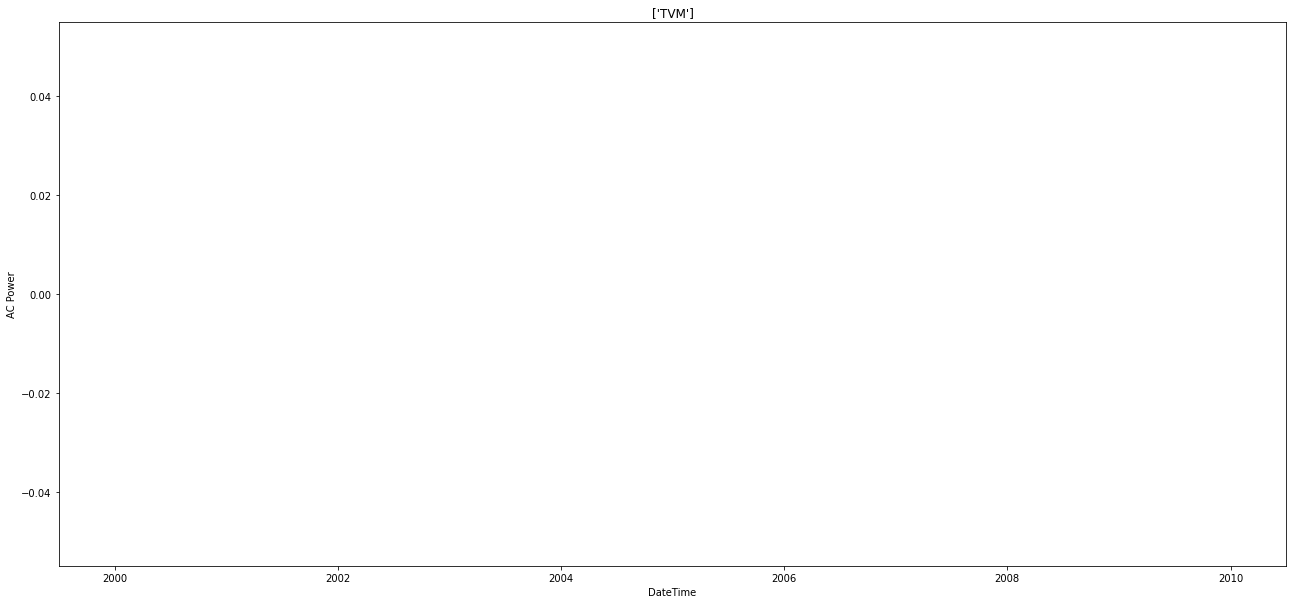

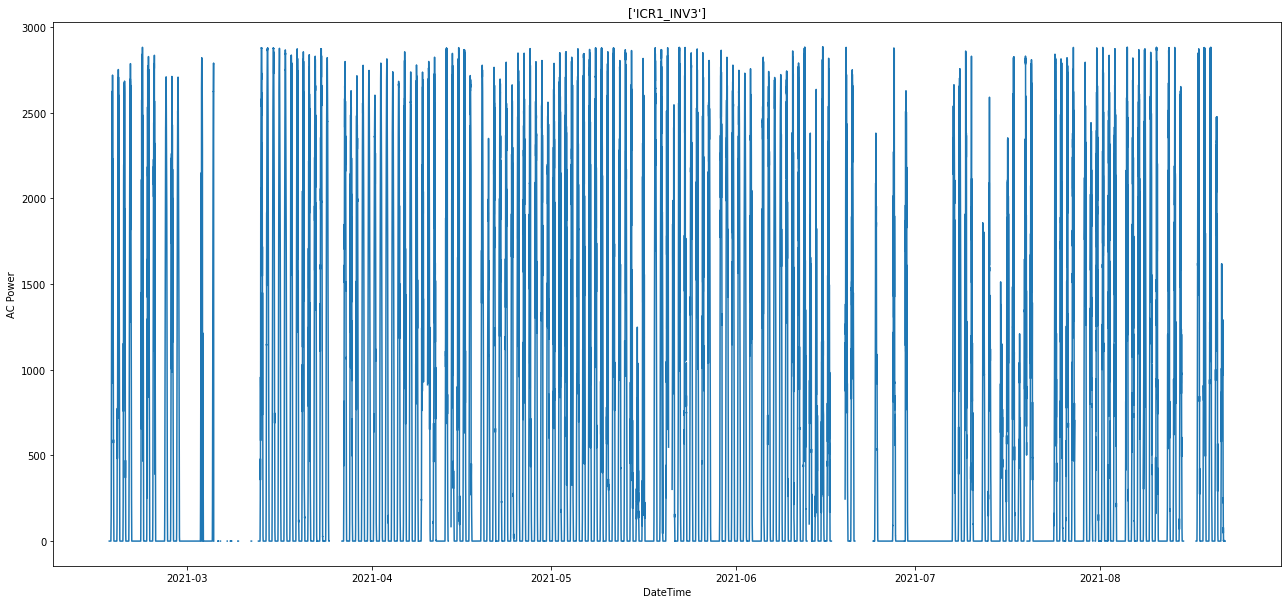

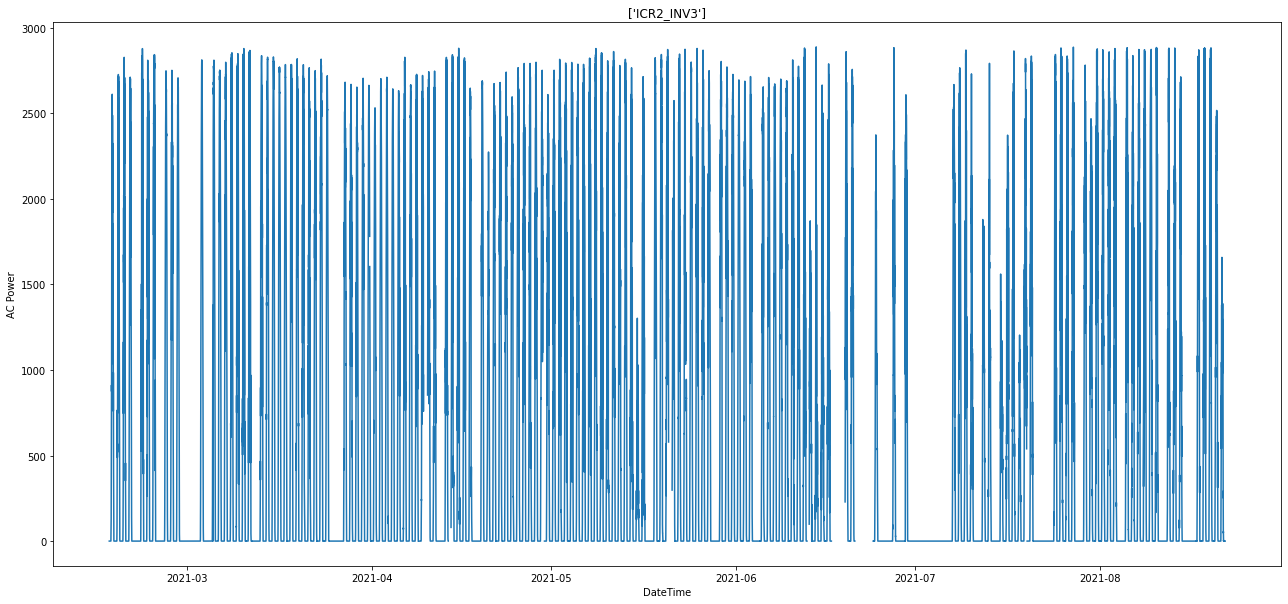

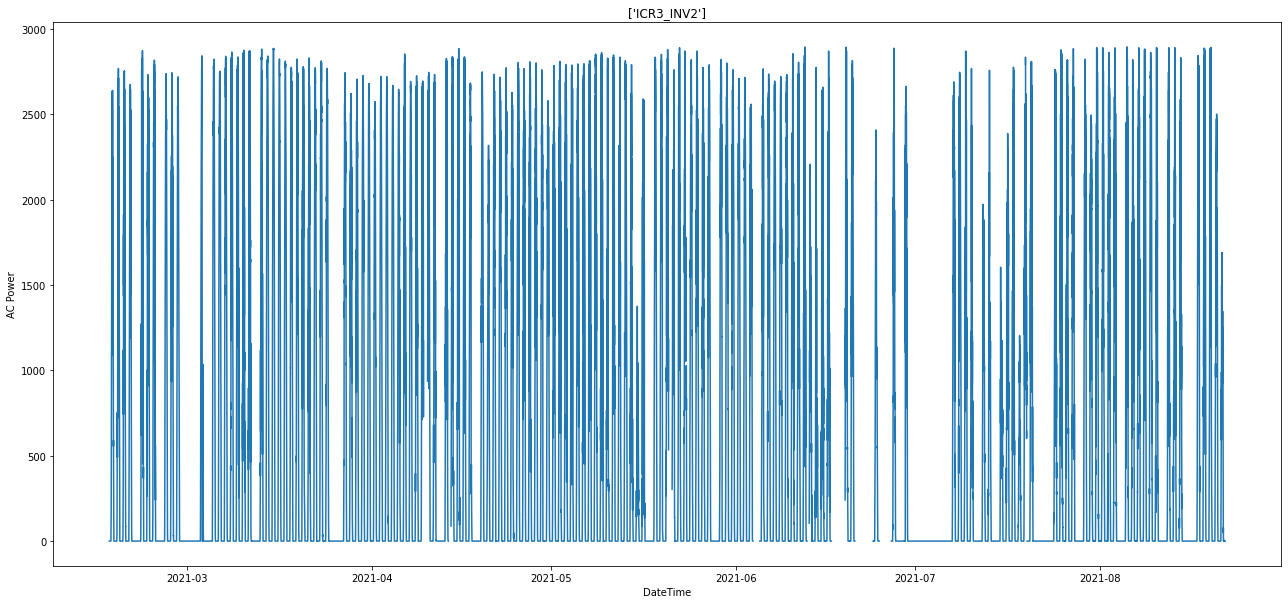

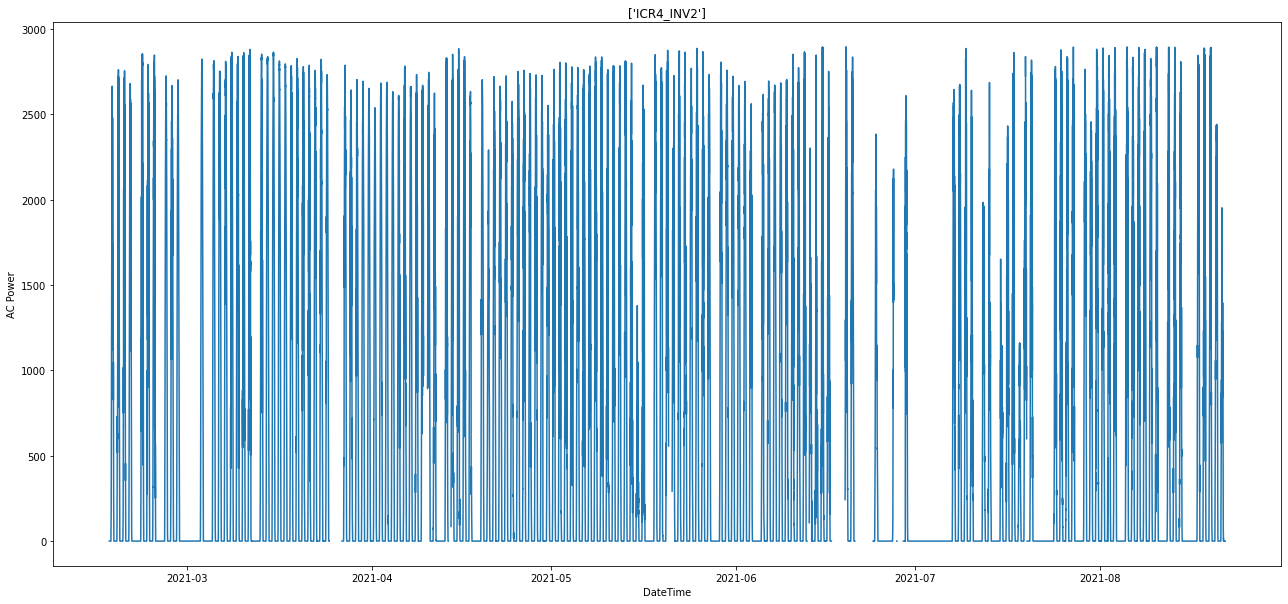

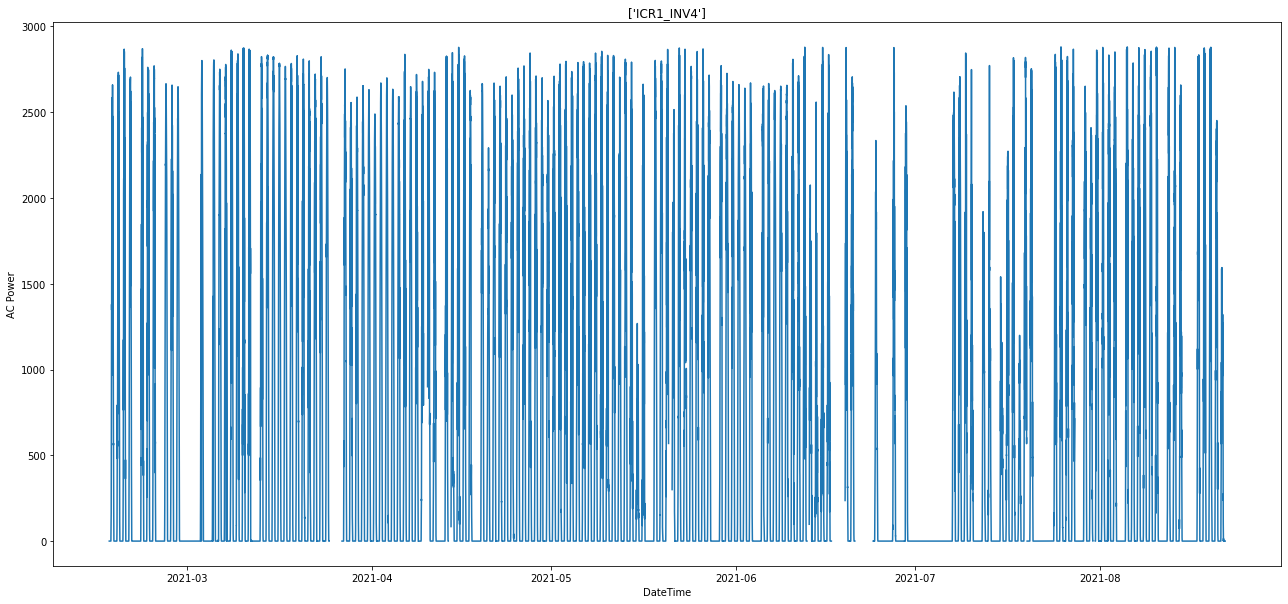

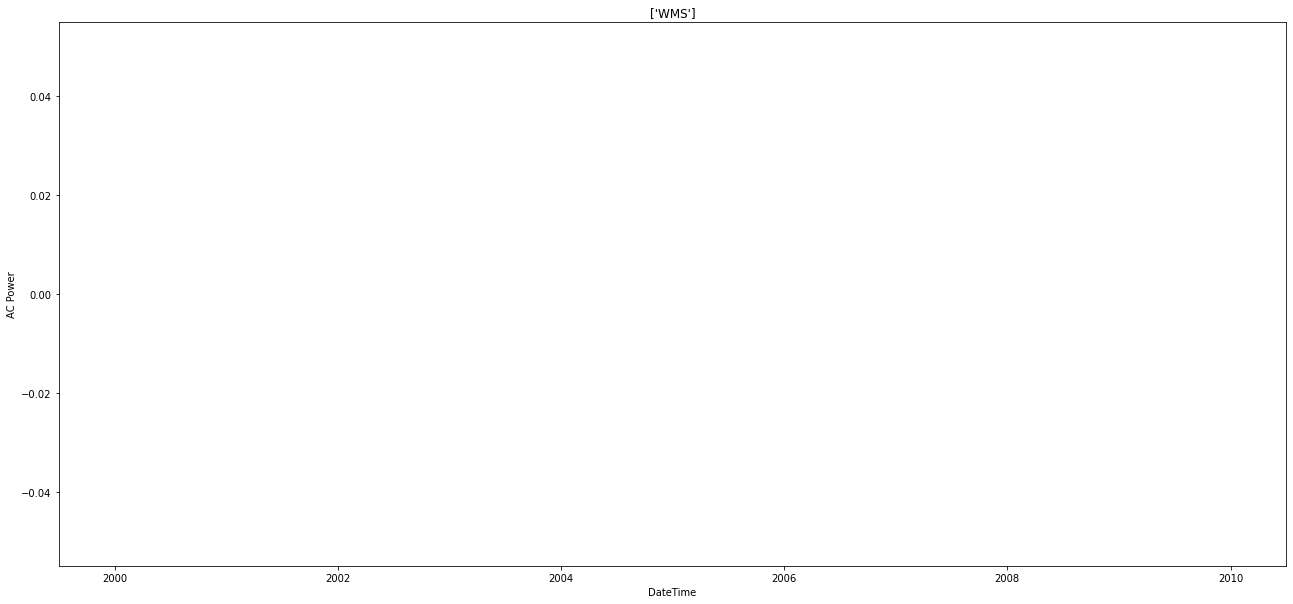

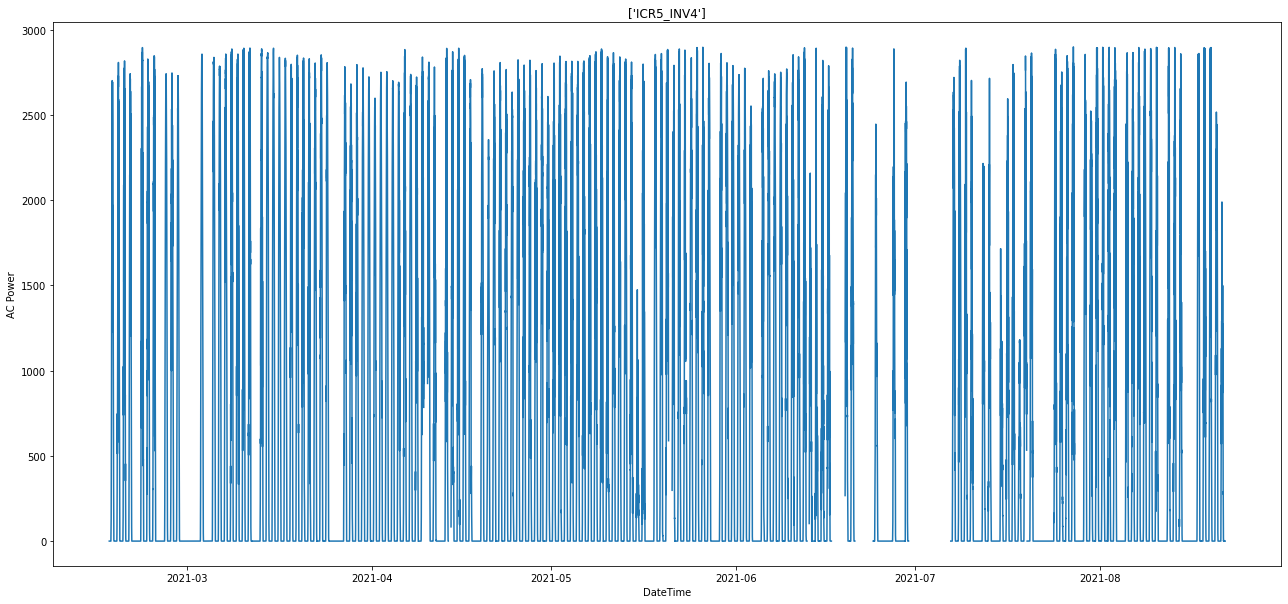

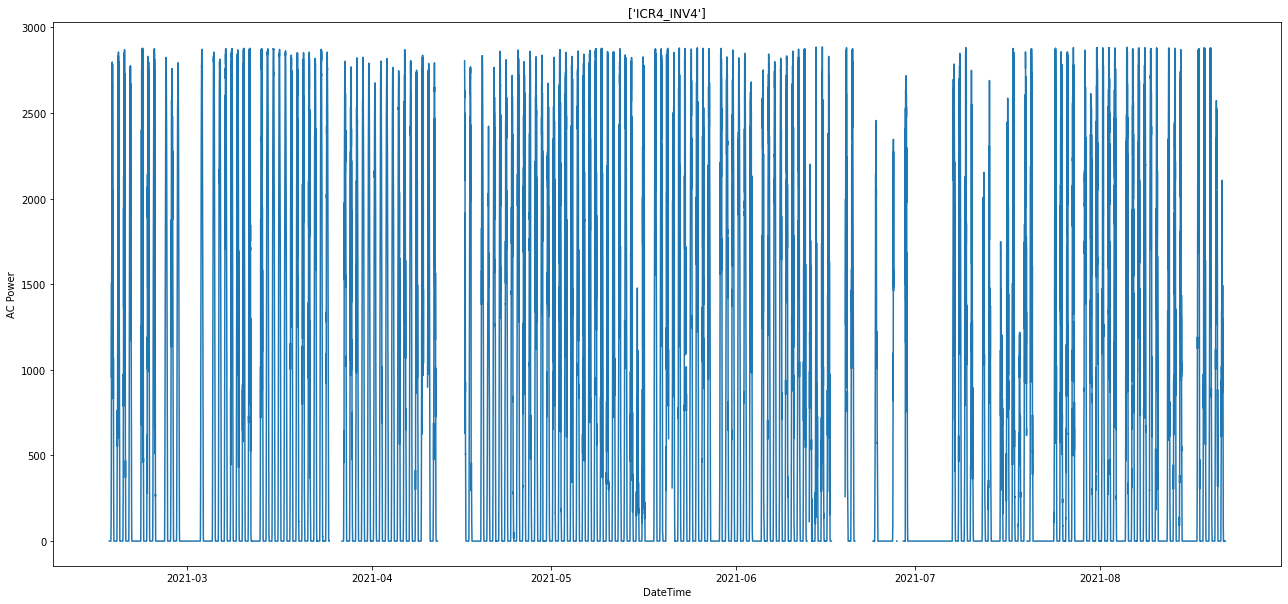

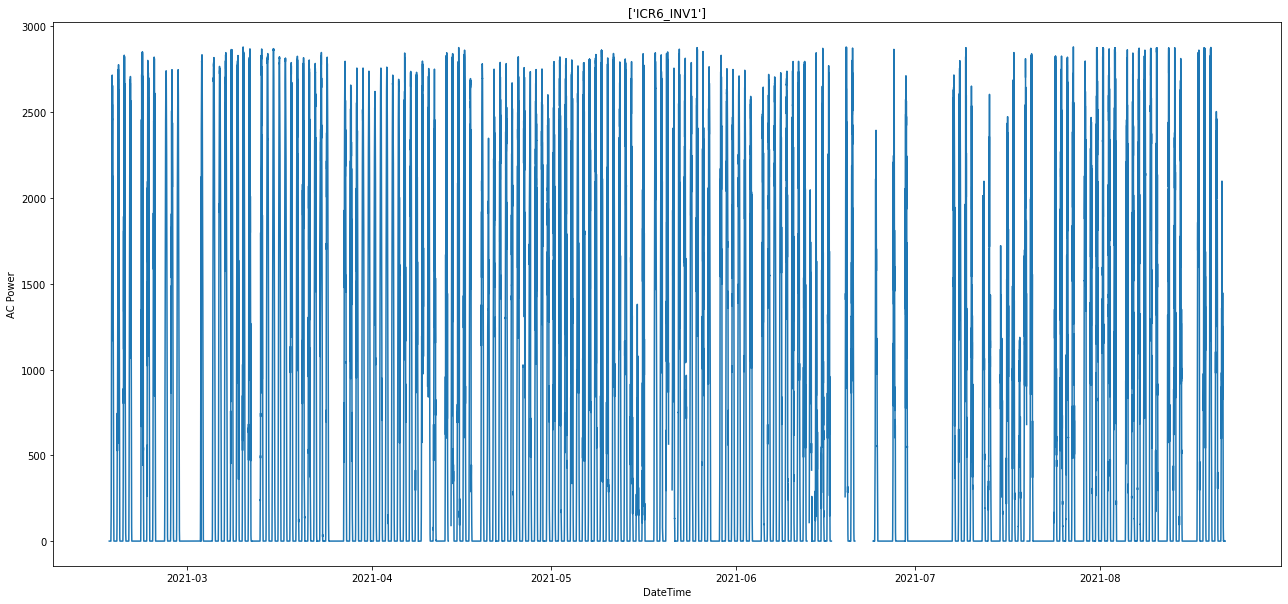

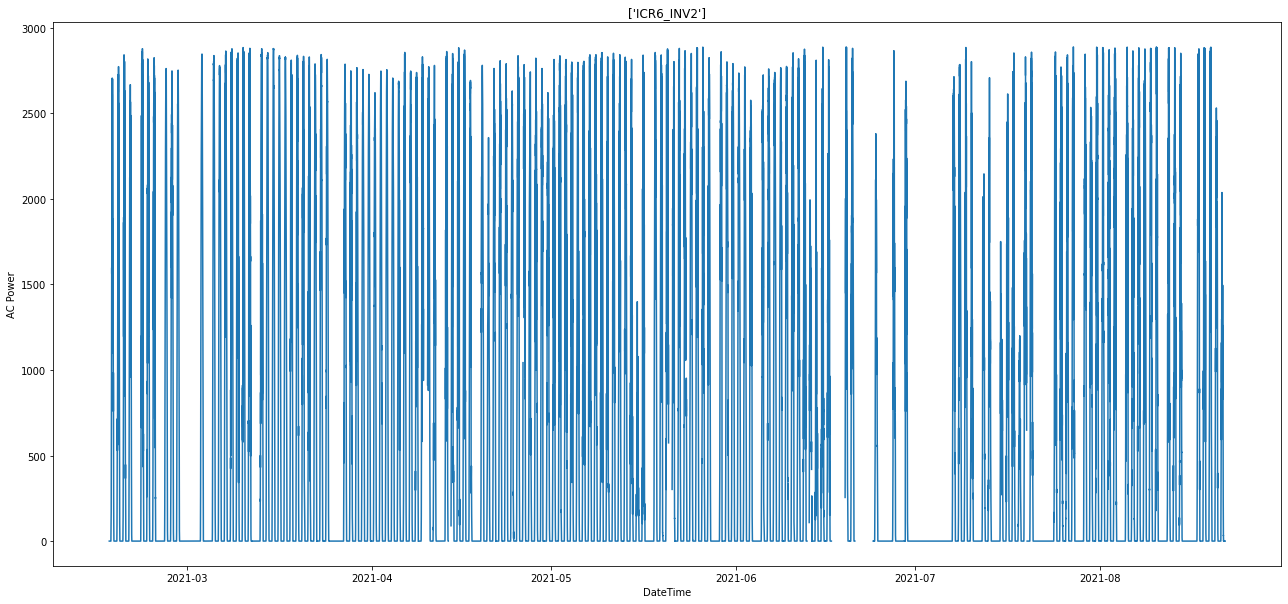

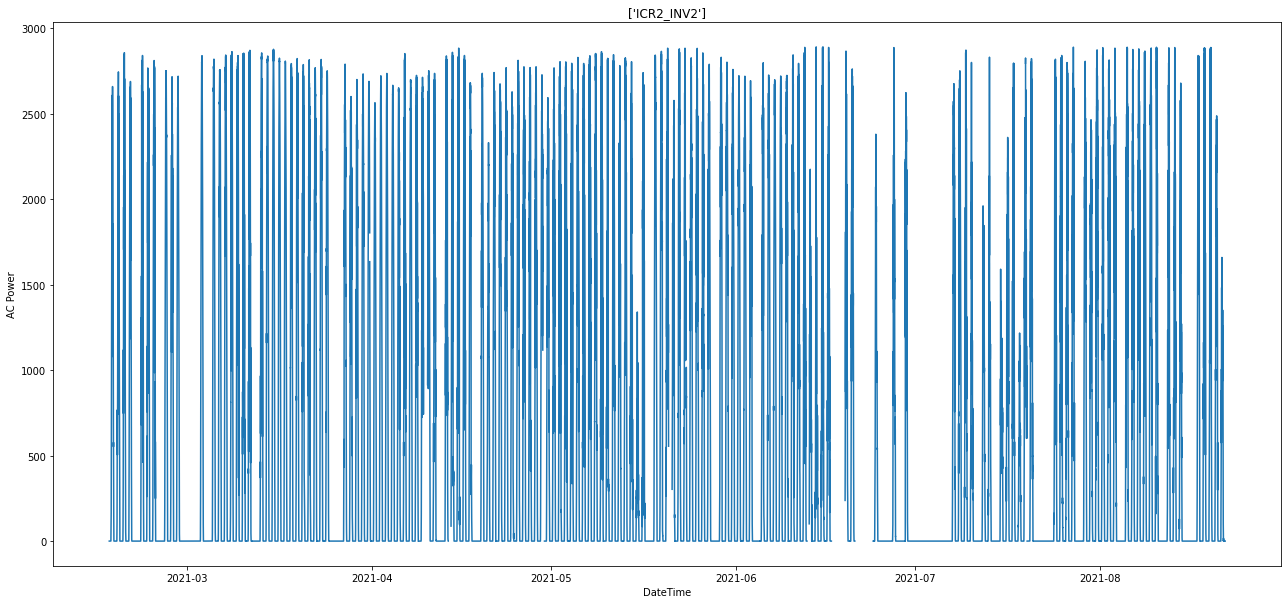

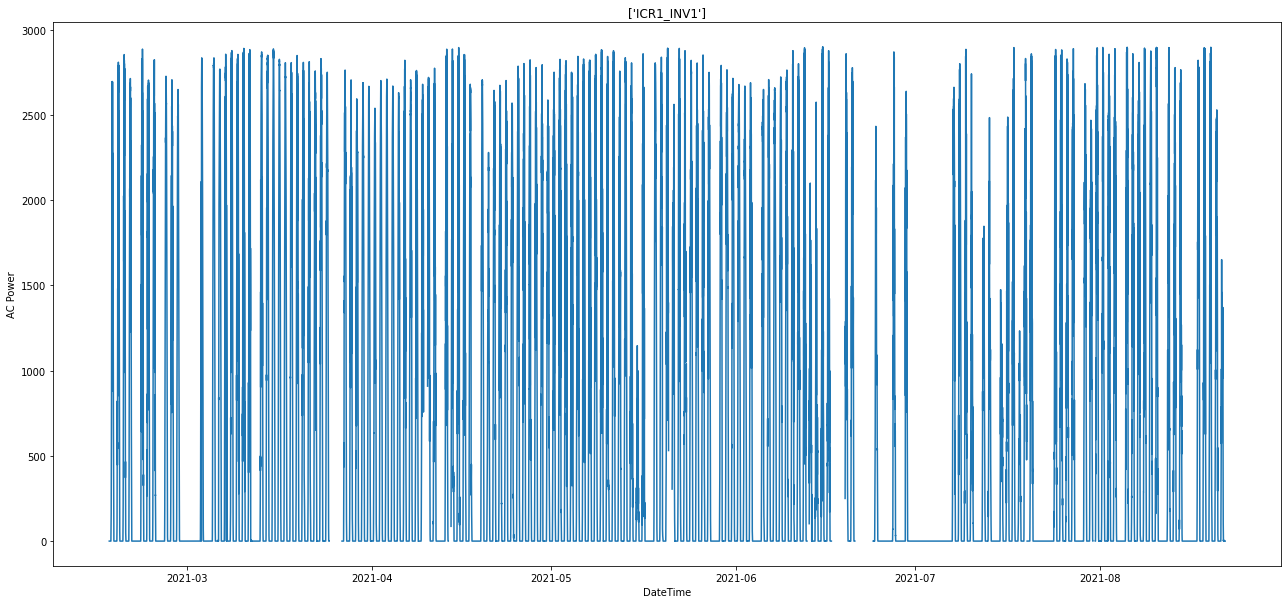

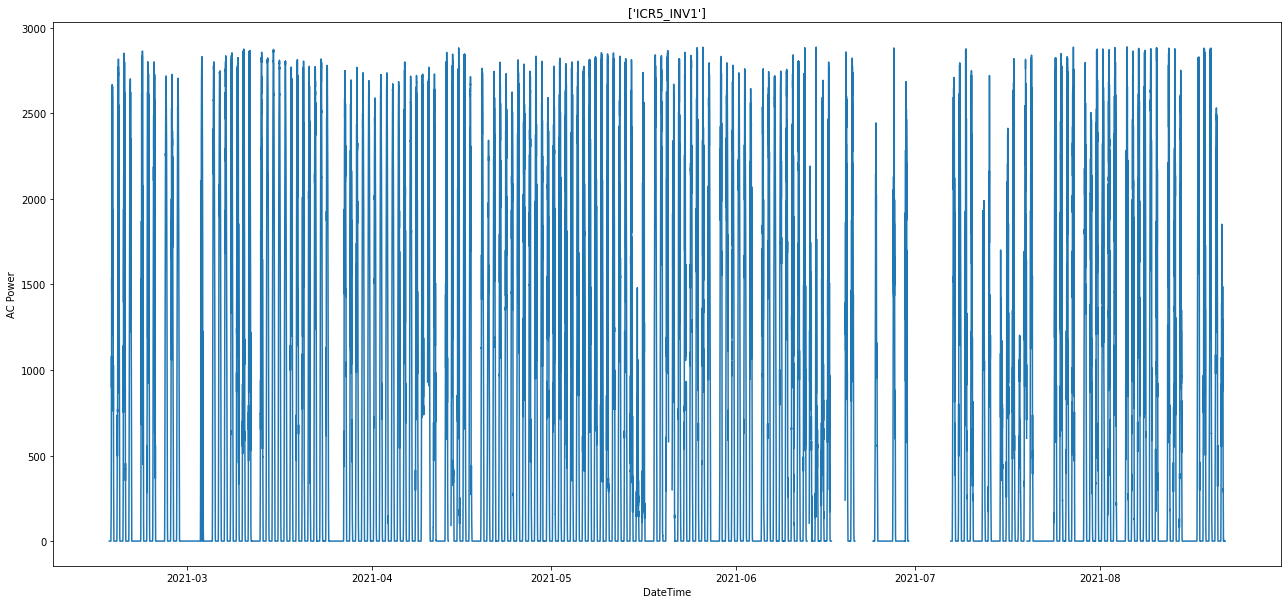

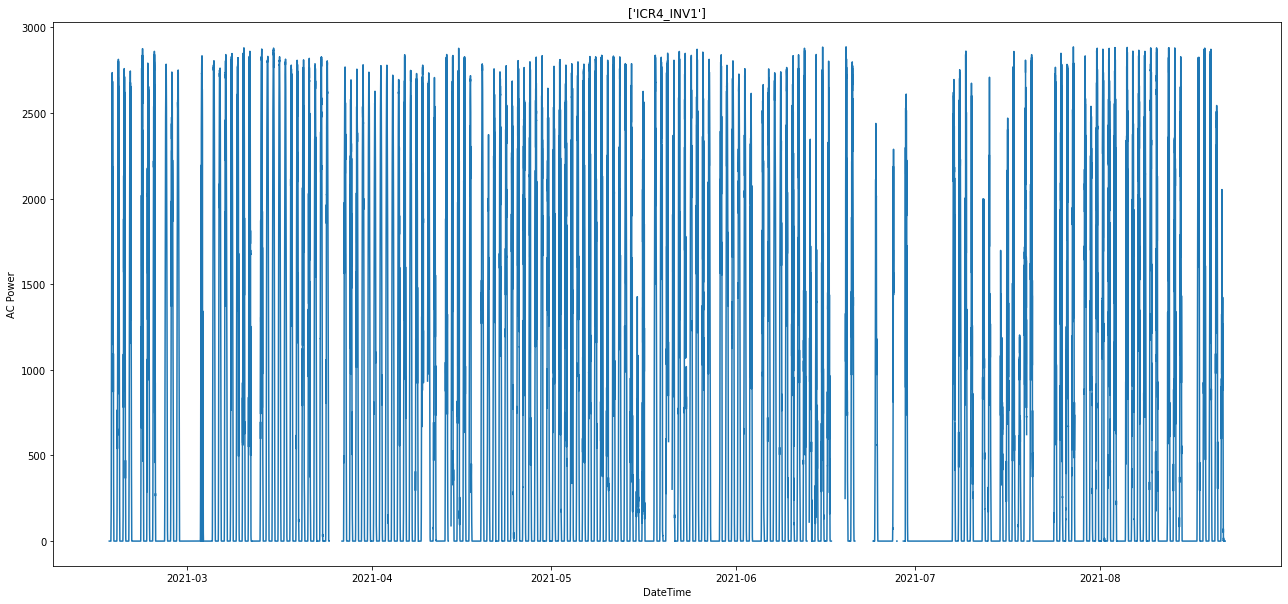

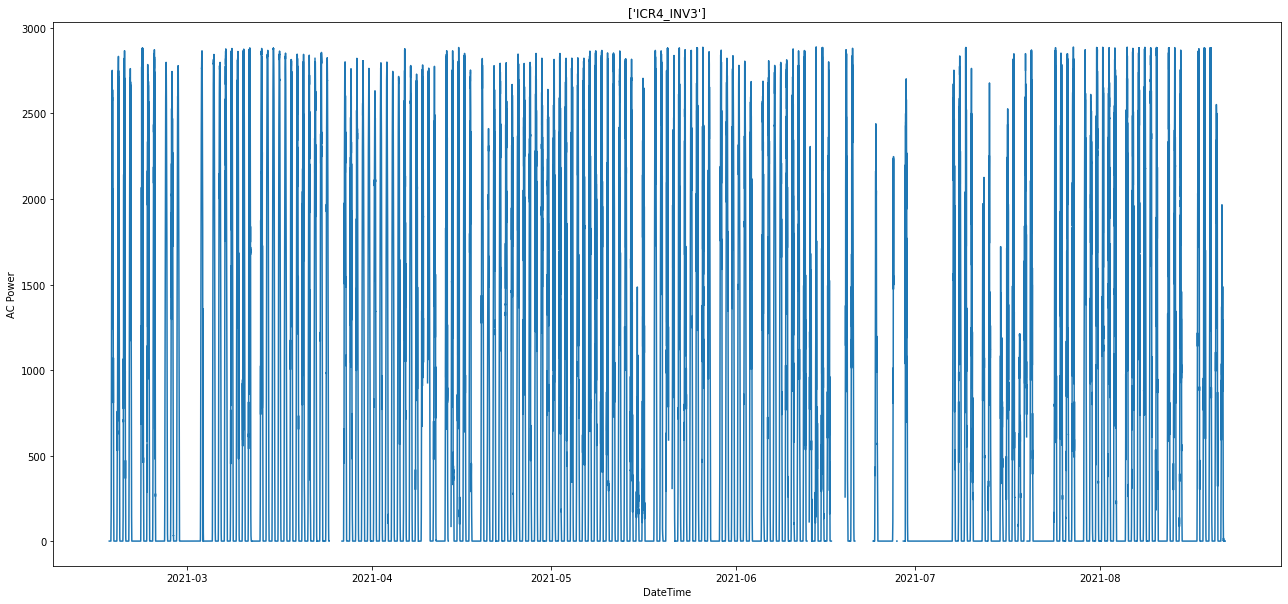

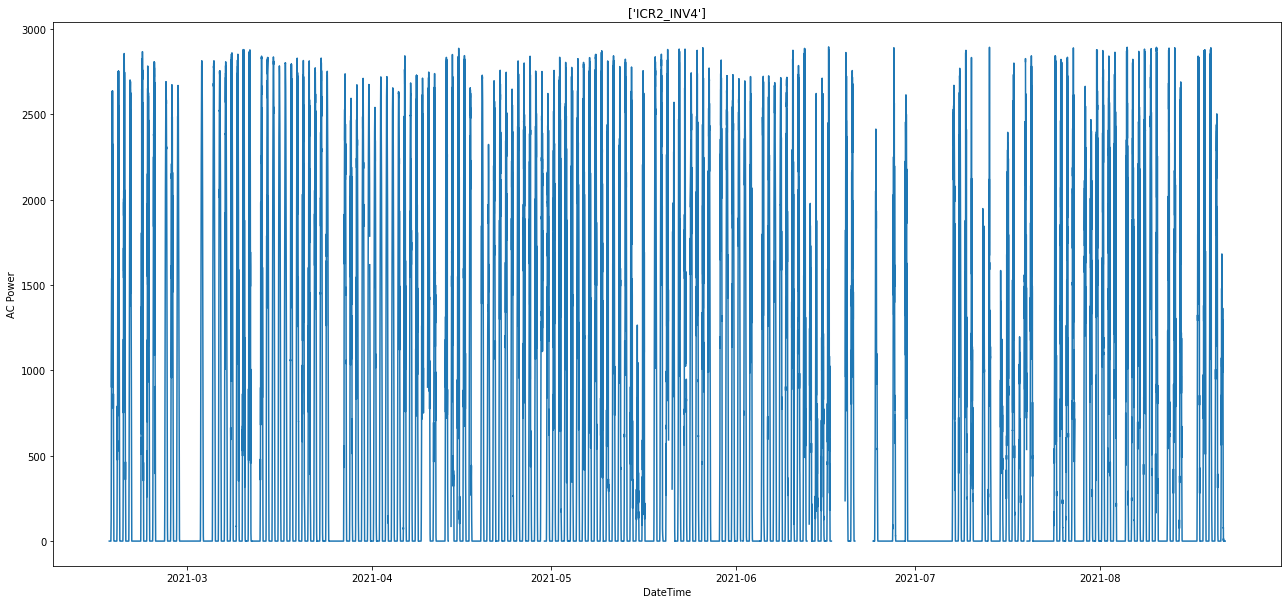

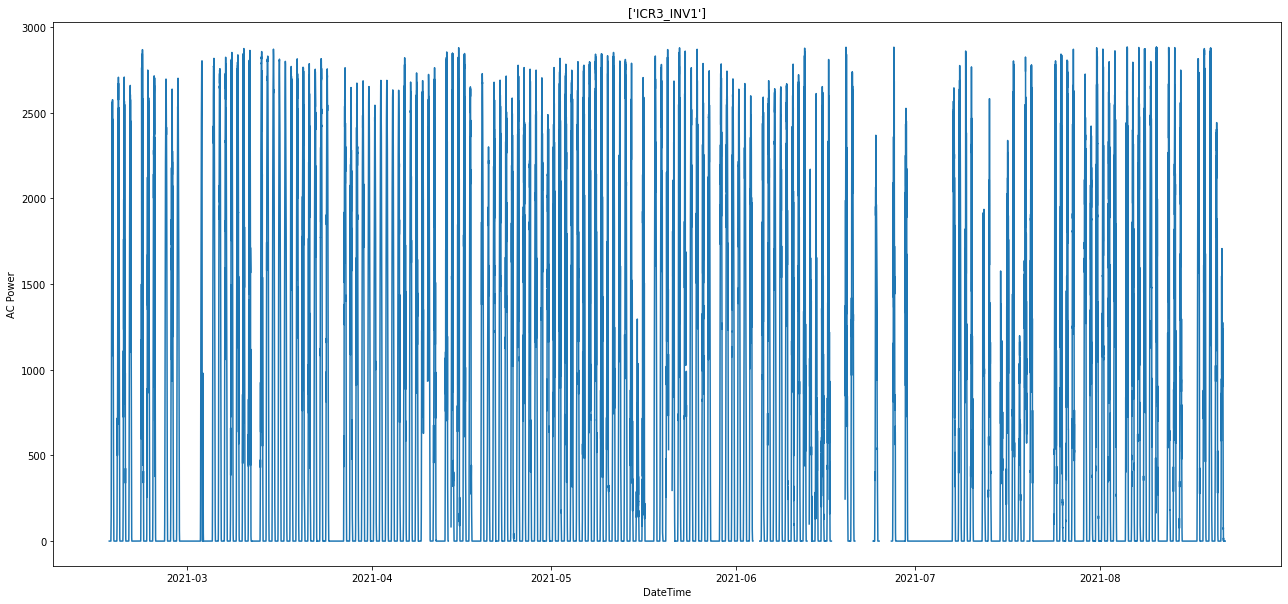

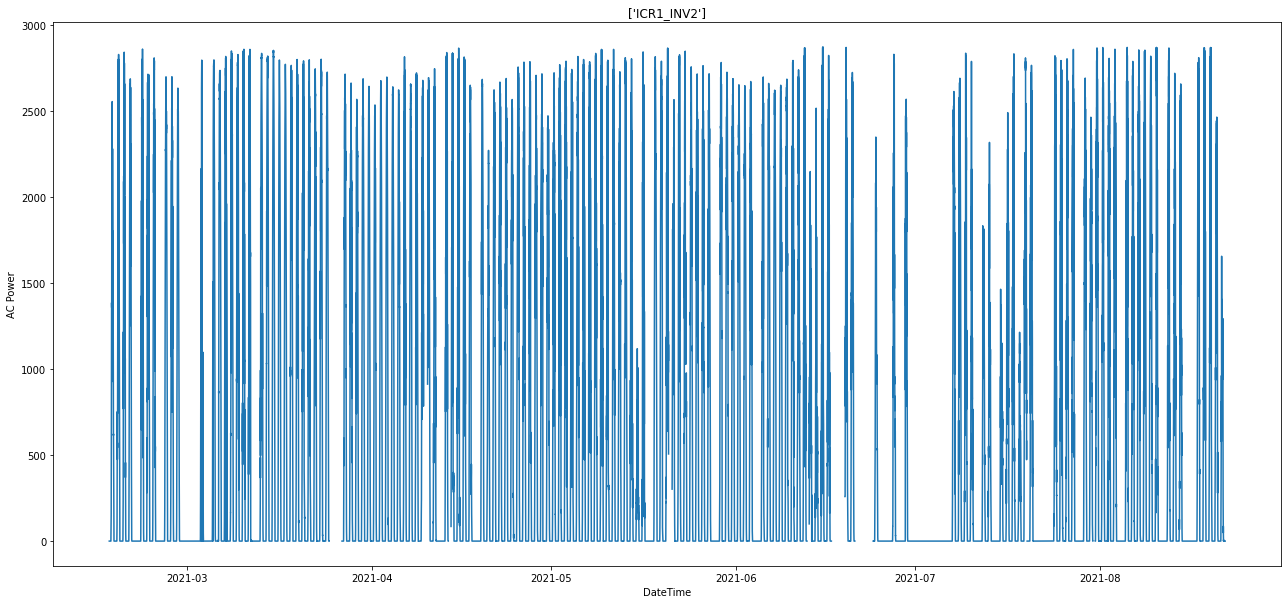

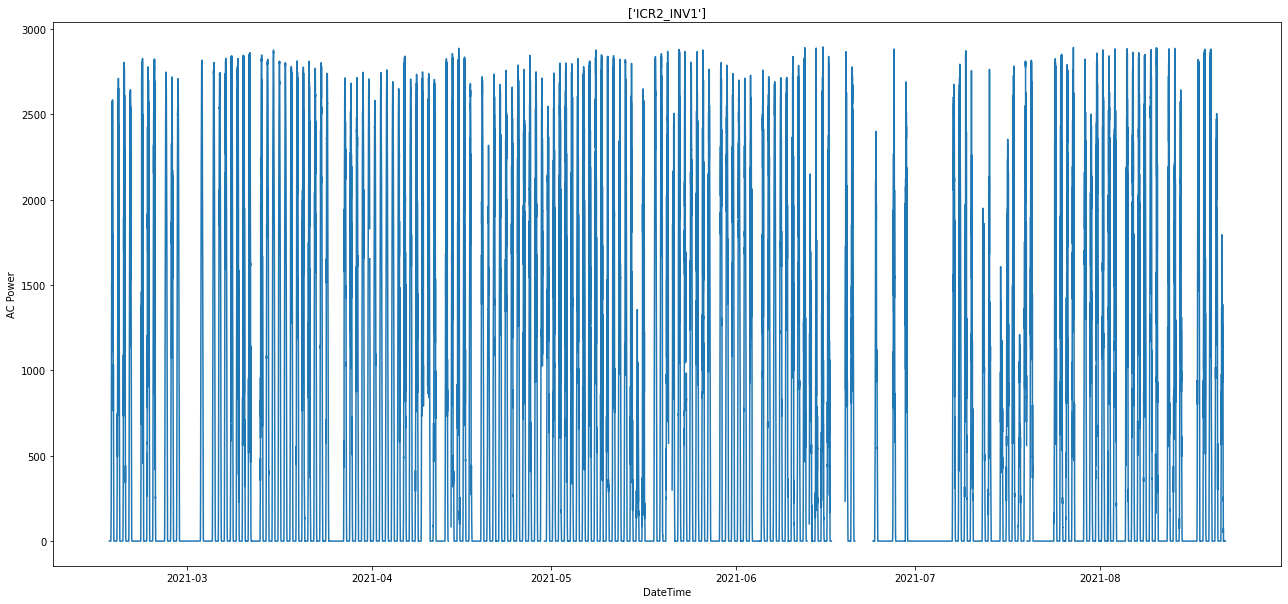

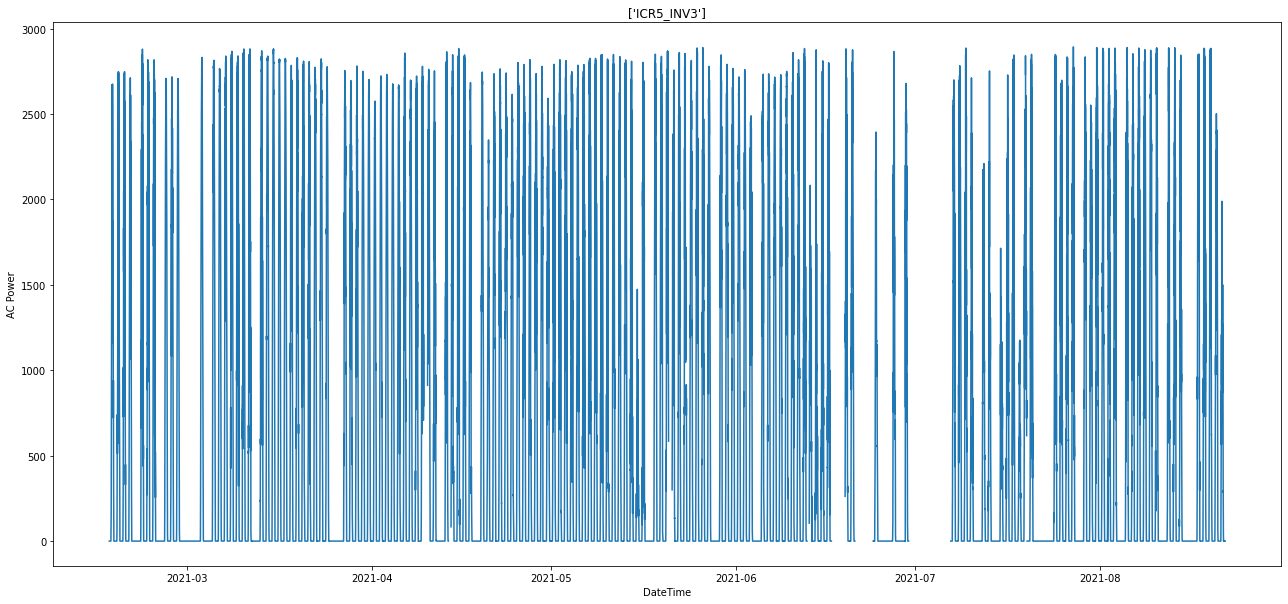

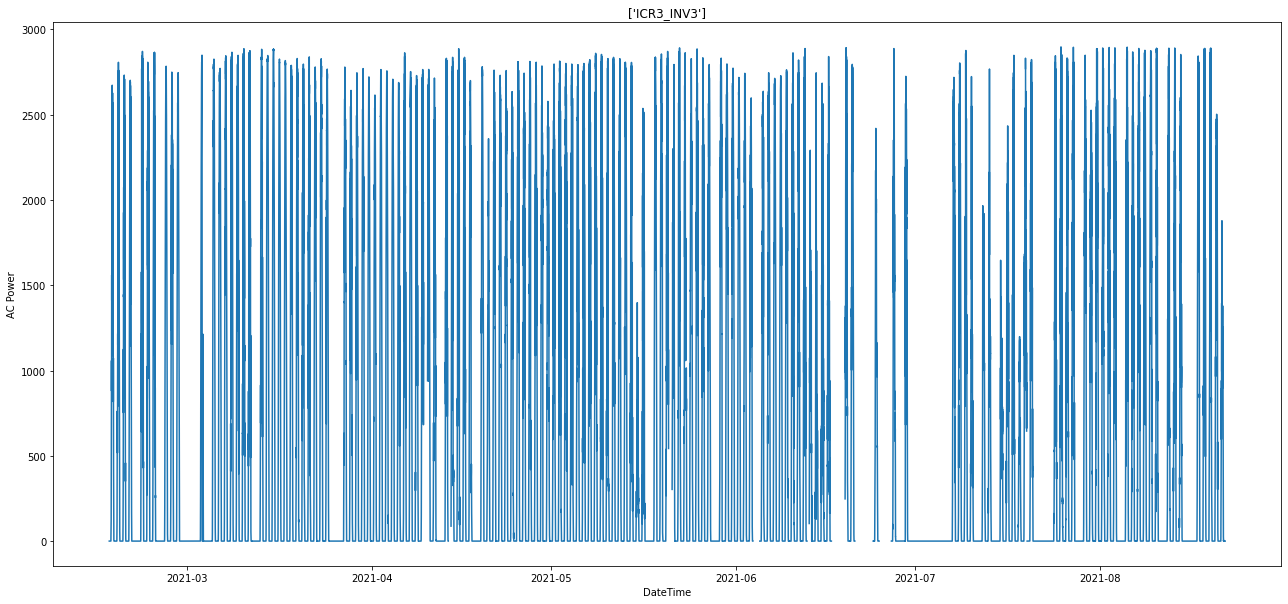

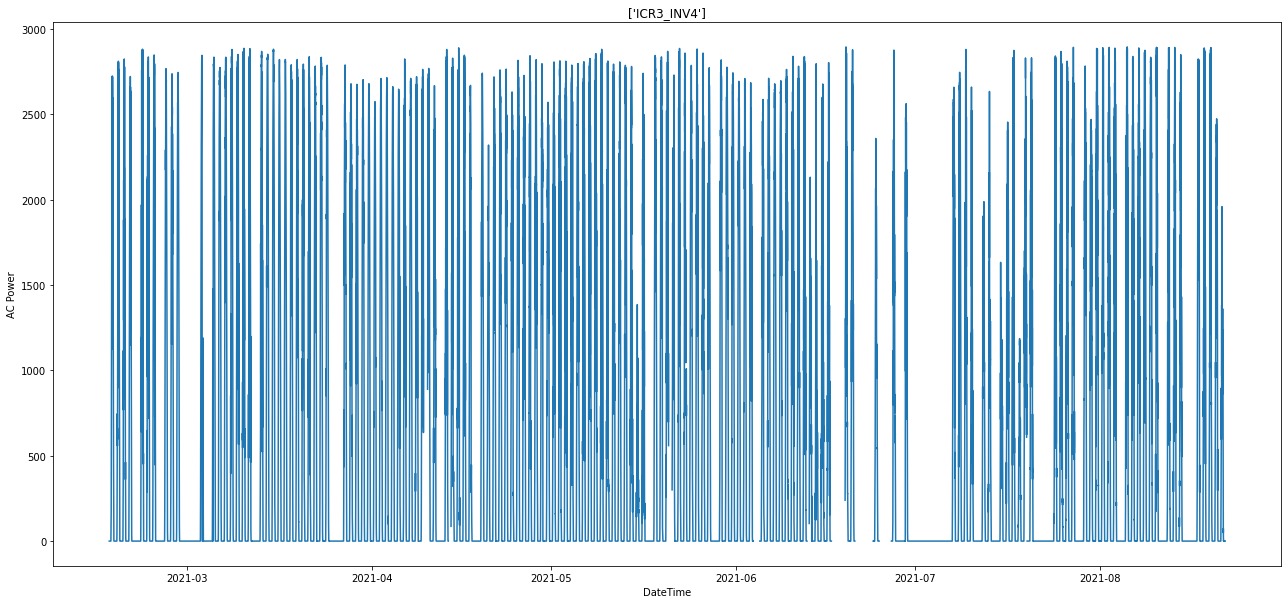

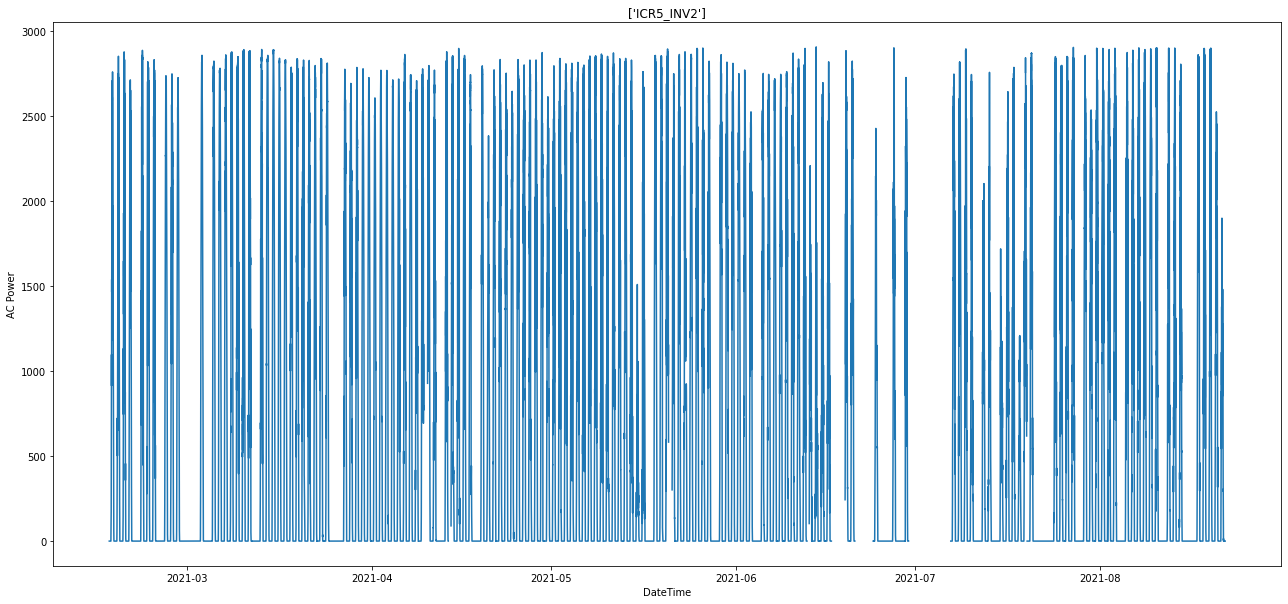

In [ ]:
assetname = df['AssetName'].unique()
for asset in assetname:
  asset = df[df['AssetName'] == asset]
  plt.figure(figsize=(22,10))
  plt.plot(asset['Date_Time'], asset['AC Power'])
  plt.title(asset['AssetName'].unique())
  plt.xlabel('DateTime')
  plt.ylabel('AC Power')
  plt.show()

In [3]:
df_new


DateTime  Hour  Ambient Temp  Module Temp  GHI  GTI  \
0      2021-02-16 00:00:00     0      22.94995     21.33753  0.0  0.0   
1      2021-02-16 00:05:00     0      22.31500     21.14517  0.0  0.0   
2      2021-02-16 00:10:00     0      22.08755     20.96527  0.0  0.0   
3      2021-02-16 00:15:00     0      22.21661     20.83107  0.0  0.0   
4      2021-02-16 00:20:00     0      22.20626     20.66763  0.0  0.0   
...                    ...   ...           ...          ...  ...  ...   
42619  2021-08-21 23:35:00    23      23.69089     23.76144  0.0  0.0   
42620  2021-08-21 23:40:00    23      23.66865     23.73989  0.0  0.0   
42621  2021-08-21 23:45:00    23      23.64114     23.70236  0.0  0.0   
42622  2021-08-21 23:50:00    23      23.62848     23.65339  0.0  0.0   
42623  2021-08-21 23:55:00    23      23.61039     23.59457  0.0  0.0   

       DC Power  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
42619       0.0  
42620       0.0  
42621       0.0  
42622       0.0  
42623       0.0  

[42624 rows x 7 columns]

In [4]:
from pyts.image import GramianAngularField
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])
gasf = GramianAngularField(method='difference')
X_gasf = gasf.fit_transform(X)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[["DC_Scaled"]] = scaler.fit_transform(
    df_new[['DC Power']])

In [6]:
df_new

DateTime  Hour  Ambient Temp  Module Temp  GHI  GTI  \
0      2021-02-16 00:00:00     0      22.94995     21.33753  0.0  0.0   
1      2021-02-16 00:05:00     0      22.31500     21.14517  0.0  0.0   
2      2021-02-16 00:10:00     0      22.08755     20.96527  0.0  0.0   
3      2021-02-16 00:15:00     0      22.21661     20.83107  0.0  0.0   
4      2021-02-16 00:20:00     0      22.20626     20.66763  0.0  0.0   
...                    ...   ...           ...          ...  ...  ...   
42619  2021-08-21 23:35:00    23      23.69089     23.76144  0.0  0.0   
42620  2021-08-21 23:40:00    23      23.66865     23.73989  0.0  0.0   
42621  2021-08-21 23:45:00    23      23.64114     23.70236  0.0  0.0   
42622  2021-08-21 23:50:00    23      23.62848     23.65339  0.0  0.0   
42623  2021-08-21 23:55:00    23      23.61039     23.59457  0.0  0.0   

       DC Power  DC_Scaled  
0           0.0   0.000325  
1           0.0   0.000325  
2           0.0   0.000325  
3           0.0   0.000325  
4           0.0   0.000325  
...         ...        ...  
42619       0.0   0.000325  
42620       0.0   0.000325  
42621       0.0   0.000325  
42622       0.0   0.000325  
42623       0.0   0.000325  

[42624 rows x 8 columns]

0        0.000325
1        0.000325
2        0.000325
3        0.000325
4        0.000325
           ...   
42619    0.000325
42620    0.000325
42621    0.000325
42622    0.000325
42623    0.000325
Name: DC_Scaled, Length: 42624, dtype: float64


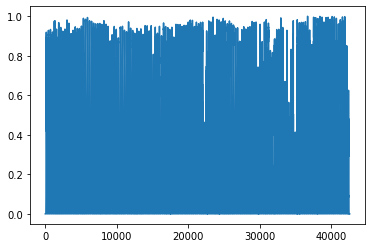

In [17]:
dc_pow = df_new['DC_Scaled']
print(dc_pow)
plt.plot(dc_pow)

In [16]:
Module_temp = df_new['Module Temp']
Module_temp = (Module_temp-Module_temp.min())/(Module_temp.max()-Module_temp.min())
Module_temp

0        0.317810
1        0.314945
2        0.312266
3        0.310267
4        0.307833
           ...   
42619    0.353913
42620    0.353592
42621    0.353033
42622    0.352304
42623    0.351428
Name: Module Temp, Length: 42624, dtype: float64

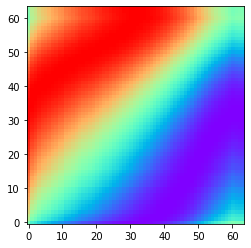

In [19]:
t = dc_pow[3620:3684]
p_actual= dc_pow[3684:3702]
x_dc = np.array([t])
dc_gasf = gasf.fit_transform(x_dc)
plt.imshow(dc_gasf[0], cmap='rainbow', origin='lower')


In [ ]:
dc_gasf.shape

(1, 64, 64)

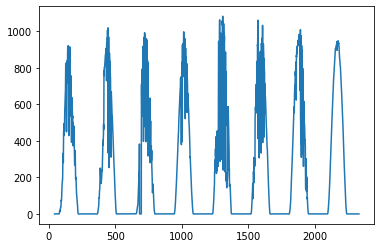

In [7]:
df_new
tmp2 = df_new['GHI'][45:2330]
tmp1 = df_new['GTI'][45:2230]
tmpdc = df_new['DC Power'][45:2230]
tmp2.plot()


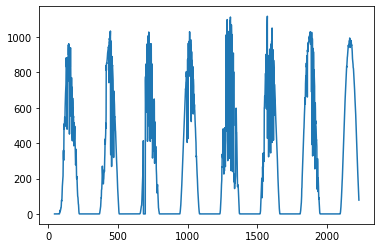

In [8]:
tmp1.plot()

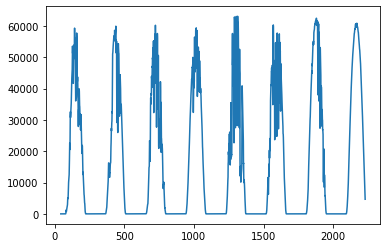

In [9]:
tmpdc.plot()

In [10]:
# creating images of time series values
import math
def create_img(u,v):
  wd = list()
  we = list()
  g = np.zeros((len(u),len(v)))
  for x,y in zip(u,v):
    if y==0.0:
      wdi=(math.pi)/2
    else:
      wdi = np.arctan(x/y)
    wei = 0.5*np.cbrt(np.sqrt(x**2 + y**2))
    wd.append(wdi)
    we.append(wei)
  wd = np.array(wd)
  we = np.array(we)
  we = (we-we.min())/(we.max()-we.min())
  for i in range(len(u)):
    for j in range(len(v)):
      g[i][j] = we[i]*math.cos(wd[i])*we[j]*math.cos(wd[j]) + we[i]*math.sin(wd[i])*we[j]*math.sin(wd[j])
  return g


In [11]:
t1 = df_new['GTI'][100:228]
t2 = df_new['GTI'][100:228]
t1 = np.array(t1)
t2 = np.array(t2)
z = np.zeros((64,64))

g = create_img(t1,t2)
g.shape

(128, 128)

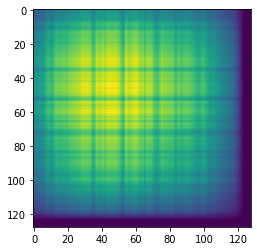

In [12]:
plt.imshow(g)

In [ ]:
from decimal import Decimal, getcontext

getcontext().prec = 2*n

a = Decimal(a)
b = Decimal(b)
c = a/b

In [21]:
import os 

img_siz = 128
y = list()
k = list()
file_location = list()
location = '/content/gdrive/My Drive/project/Images_1'
for i in range(len(df_new)-129):
  l = i+img_siz
  tmp1 = df_new['GHI'][i:l]
  tmp2 = df_new['GTI'][i:l]
  k = dc_pow[l]
  y.append(k)
  # x_dc = np.array([tmp])
  # dc_gasf = gasf.fit_transform(x_dc)
  img = create_img(tmp1,tmp2)
  filename = str(i) + '.png' 
  dir = os.path.join(location, filename)
  file_location.append(dir)
  plt.imsave(dir, img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
import cv2 as cv
img = cv.imread('/content/gdrive/My Drive/project/images_1/152.png')
img.shape

In [24]:
type(file_location)

list

In [23]:
df_img = pd.DataFrame(file_location)
df_img['File_loc'] = file_location[0:42476,]
df_img['DC_Pow'] = y[17:,]
df_img.drop(df_img.columns[[0]], axis=1,inplace=True)

TypeError: ignored

In [ ]:
df_img

File_loc    DC_Pow
0      /content/gdrive/My Drive/project/images_128_1/...  0.777640
1      /content/gdrive/My Drive/project/images_128_1/...  0.829848
2      /content/gdrive/My Drive/project/images_128_1/...  0.794768
3      /content/gdrive/My Drive/project/images_128_1/...  0.817594
4      /content/gdrive/My Drive/project/images_128_1/...  0.751928
...                                                  ...       ...
42490  /content/gdrive/My Drive/project/images_128_1/...  0.000325
42491  /content/gdrive/My Drive/project/images_128_1/...  0.000325
42492  /content/gdrive/My Drive/project/images_128_1/...  0.000325
42493  /content/gdrive/My Drive/project/images_128_1/...  0.000325
42494  /content/gdrive/My Drive/project/images_128_1/...  0.000325

[42495 rows x 2 columns]

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_img, train_size=0.8, shuffle=False, random_state=1)

In [ ]:
#rescaling and validation split
import tensorflow as tf
from tensorflow.keras import layers
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# divding data into train validation and test
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_loc',
    y_col='DC_Pow',
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_loc',
    y_col='DC_Pow',
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_loc',
    y_col='DC_Pow',
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 27197 validated image filenames.
Found 6799 validated image filenames.
Found 8499 validated image filenames.


In [ ]:
# CNN model
inputs = tf.keras.Input(shape=(128, 128, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)
# Model Fitting
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    shuffle = False,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
850/850 [==============================] - 145s 158ms/step - loss: 0.1009 - mean_absolute_error: 0.2705 - val_loss: 0.1193 - val_mean_absolute_error: 0.2641
Epoch 2/20
850/850 [==============================] - 133s 156ms/step - loss: 0.0925 - mean_absolute_error: 0.2583 - val_loss: 0.1133 - val_mean_absolute_error: 0.2635
Epoch 3/20
850/850 [==============================] - 132s 155ms/step - loss: 0.0907 - mean_absolute_error: 0.2544 - val_loss: 0.1102 - val_mean_absolute_error: 0.2643
Epoch 4/20
850/850 [==============================] - 133s 156ms/step - loss: 0.0887 - mean_absolute_error: 0.2506 - val_loss: 0.1082 - val_mean_absolute_error: 0.2607
Epoch 5/20
850/850 [==============================] - 130s 153ms/step - loss: 0.0878 - mean_absolute_error: 0.2490 - val_loss: 0.1066 - val_mean_absolute_error: 0.2549
Epoch 6/20
850/850 [==============================] - 131s 154ms/step - loss: 0.0821 - mean_absolute_error: 0.2386 - val_loss: 0.0801 - val_mean_absolute_error:

In [ ]:
#predicted DC pow
predicted_dc_pow = np.squeeze(model.predict(test_images))
true_dc_pow = test_images.labels

In [ ]:
pred = pd.DataFrame(predicted_dc_pow, columns = ['P_dc'])

inversed = scaler.inverse_transform(pred)
true = pd.DataFrame(true_dc_pow, columns = ['T_dc'])
true_rescaled = scaler.inverse_transform(true)
true_rescaled

array([[17821.8],
       [17828.5],
       [17278.1],
       ...,
       [    0. ],
       [    0. ],
       [    0. ]])

count    42624.000000
mean     15546.998998
std      20893.303733
min        -21.000000
25%          0.000000
50%        295.450000
75%      31897.550000
max      64571.200000
Name: DC Power, dtype: float64

In [ ]:
import math
MSE = np.square(np.subtract(true_dc_pow,predicted_dc_pow)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

0.1459270628426955

In [ ]:
null_rmse = np.sqrt(np.sum((true_dc_pow - np.mean(true_dc_pow))**2) / len(true_dc_pow))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 0.31202


In [ ]:
df_final = pd.DataFrame(true_dc_pow)
df_final['True_pow'] = true_dc_pow
df_final['Pred_pow'] = predicted_dc_pow
df_final.drop(df_final.columns[[0]], axis=1,inplace=True)
df_final

True_pow  Pred_pow
0     0.276238  0.612208
1     0.276341  0.613436
2     0.267820  0.613973
3     0.251369  0.614407
4     0.266243  0.614734
...        ...       ...
8494  0.000325  0.014052
8495  0.000325  0.013856
8496  0.000325  0.013395
8497  0.000325  0.012911
8498  0.000325  0.012490

[8499 rows x 2 columns]

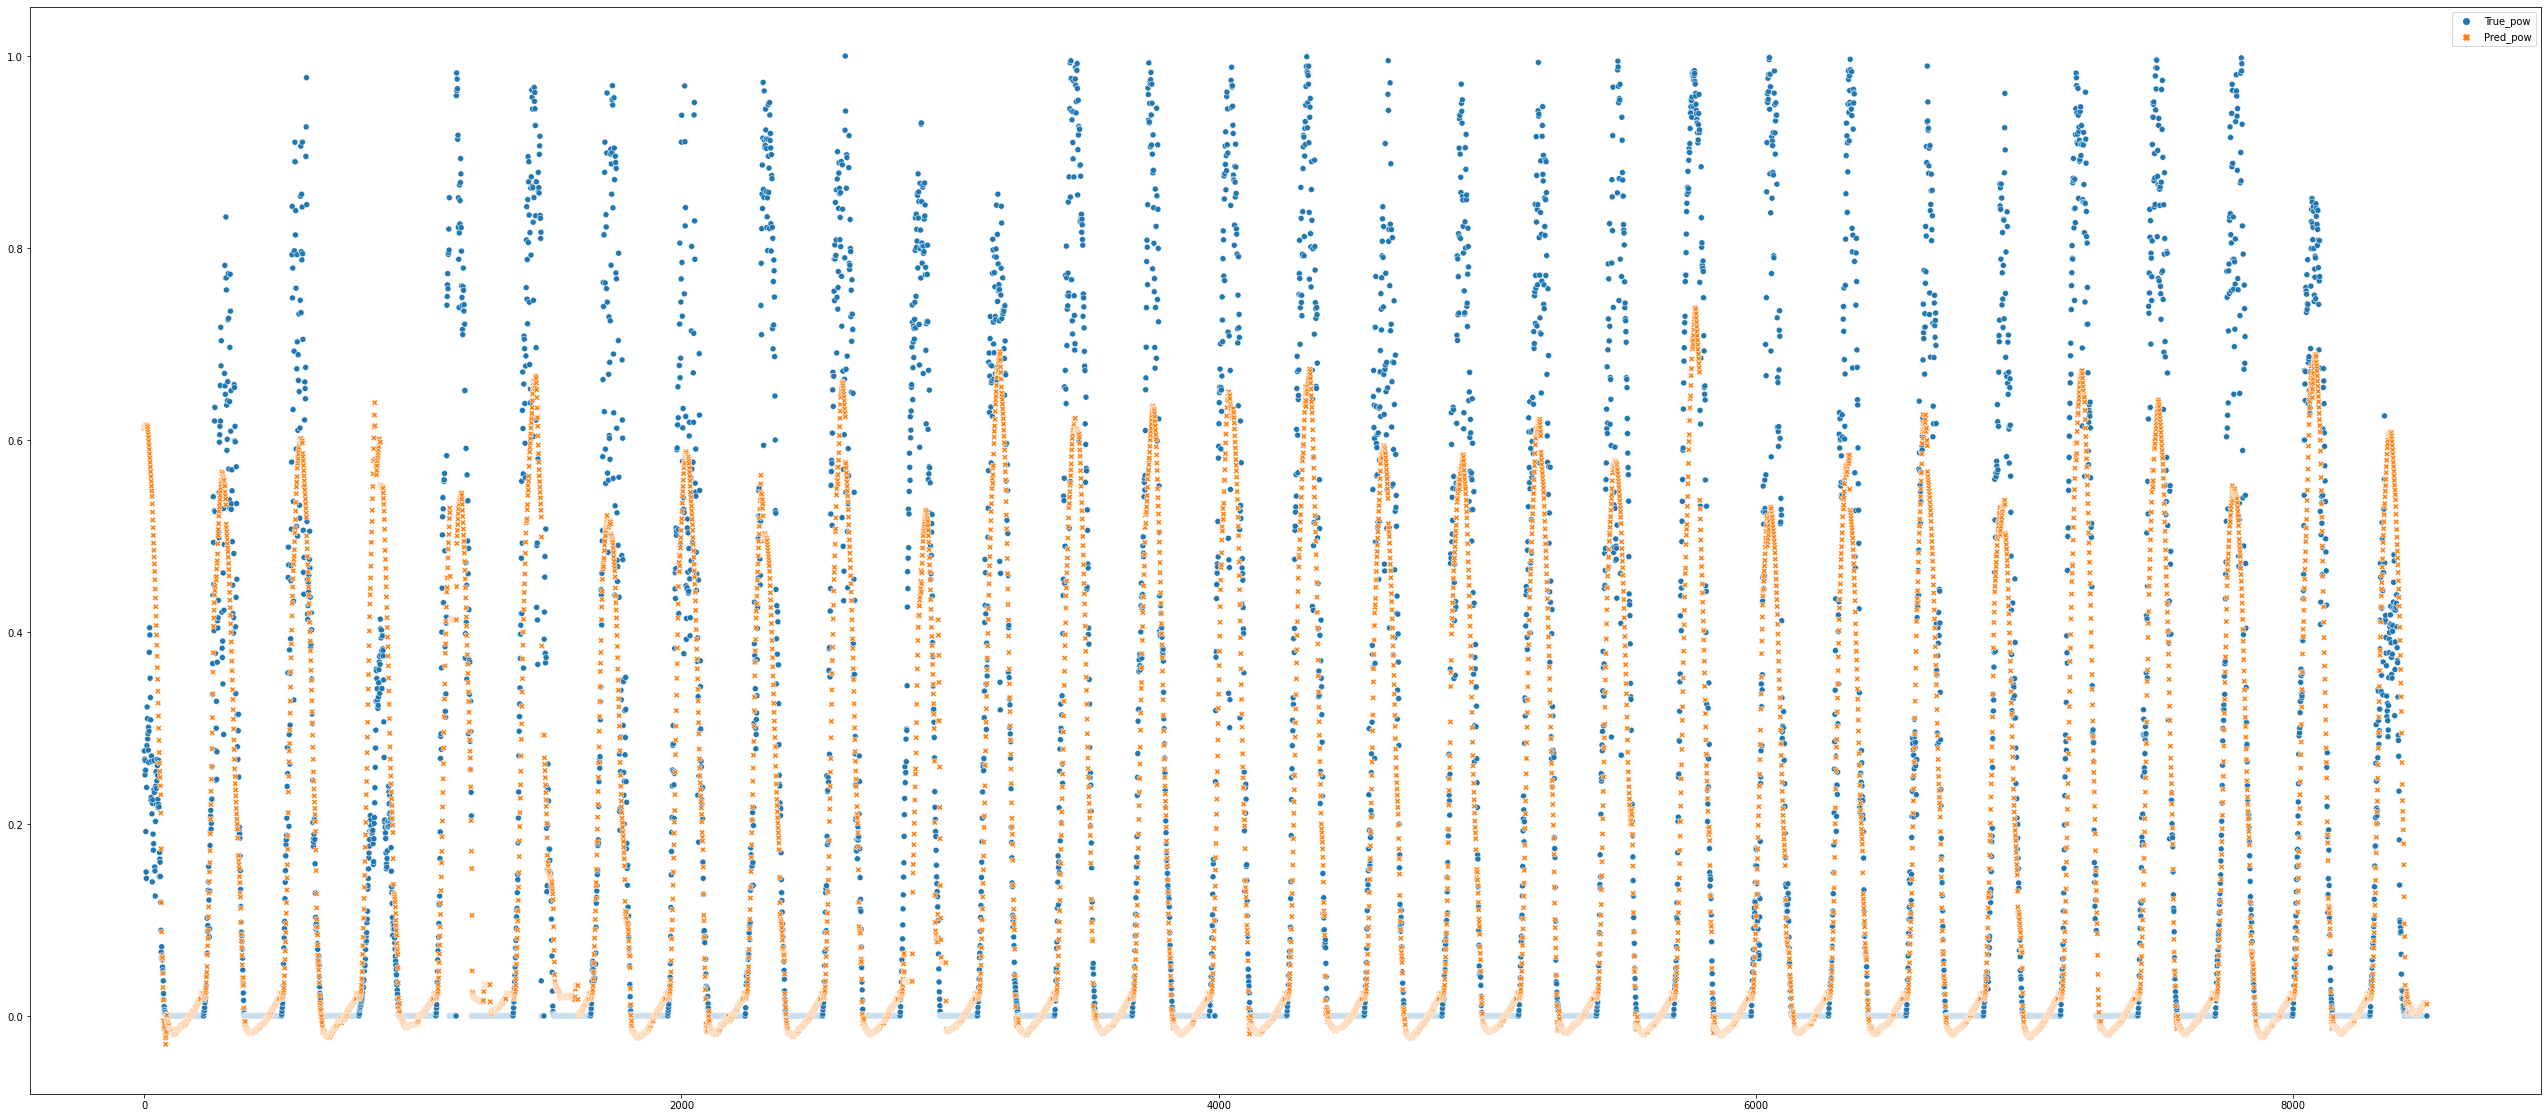

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(45, 20))
sns.scatterplot(data = df_final[['True_pow', 'Pred_pow']])

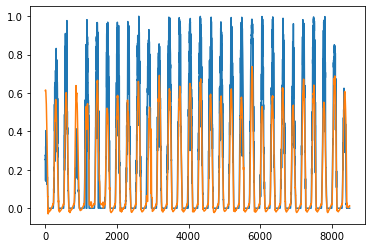

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_final['True_pow'])
plt.plot(df_final['Pred_pow'])


In [ ]:
from sklearn.metrics import mean_squared_error

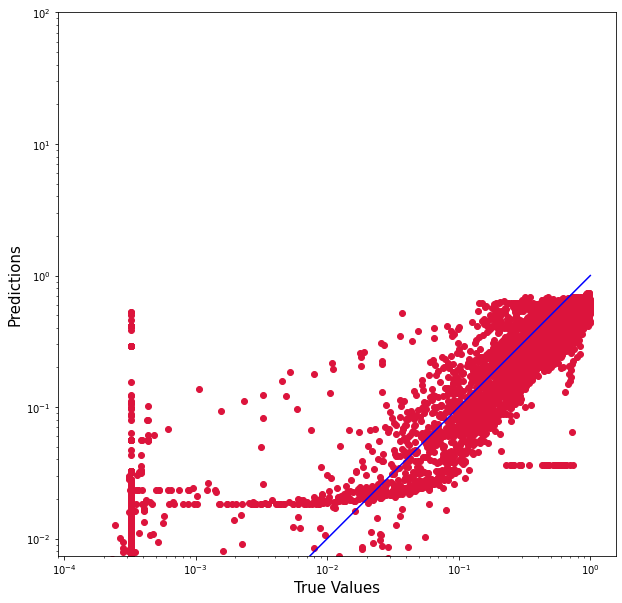

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(true_dc_pow, predicted_dc_pow, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_dc_pow), max(true_dc_pow))
p2 = min(min(predicted_dc_pow), min(true_dc_pow))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

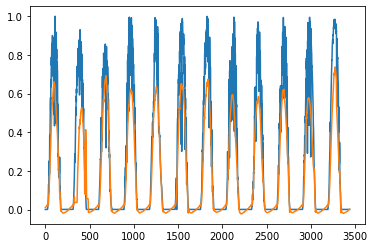

In [ ]:
true_5_day = true_dc_pow[2500:5940]
pred_5_day = predicted_dc_pow[2500:5940]
plt.plot(true_5_day)
plt.plot(pred_5_day)

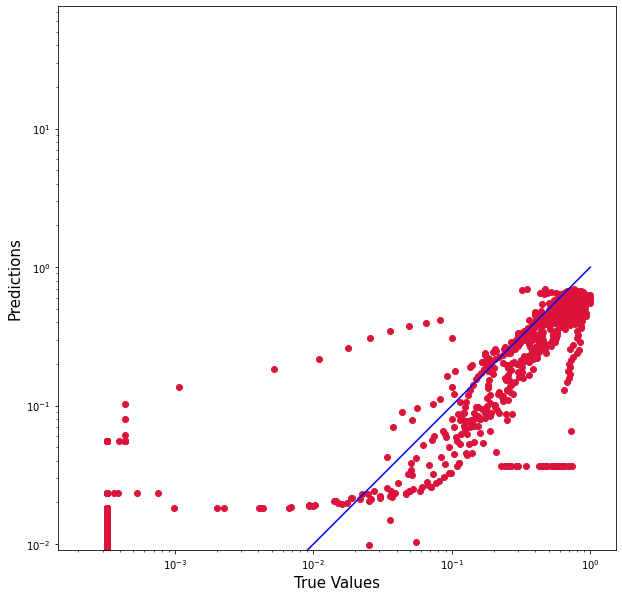

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(true_5_day, pred_5_day, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_dc_pow), max(true_dc_pow))
p2 = min(min(predicted_dc_pow), min(true_dc_pow))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# loc = '/content/gdrive/My Drive/project/test'
# def preprocess(k,i):
#   k = np.array([k])
#   k_1 = gasf.fit_transform(k)
#   filename = str(i) + '.png' 
#   dir = os.path.join(loc, filename)
#   plt.imsave(dir,k_1[0], cmap='rainbow', origin='lower')
#   return dir
# p_pred = []
# for i in range(18):
#   tmp_1 = preprocess(t[i:],i)
#   img = cv.imread(tmp_1)
#   op = model.predict(img)
#   p_pred.append(op)
#   tmp_1.append(op)